###### Bring in necessary imports

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.graph_objects as px

###### Read in data and drop unnecessary columns and description row

In [3]:
df_firm_employment_size = pd.read_csv('../data/firm_employment_size.csv')
df_firm_statistics = pd.read_csv('../data/firms_statistics.csv')
df_years_in_business = pd.read_csv('../data/years_in_business.csv')
droplist = ['Unnamed: 0','Unnamed: 33','GEO_ID','NAME','NAICS2017','NAICS2017_LABEL','ETH_GROUP','ETH_GROUP_LABEL','RACE_GROUP','RACE_GROUP_LABEL','VET_GROUP','VET_GROUP_LABEL','YEAR','FIRMPDEMP']
df_firm_employment_size.drop(droplist,inplace=True,axis=1)
df_firm_employment_size.drop(0,inplace=True,axis=0)
# df_firm_employment_size

###### Isolate specific rows relevant to this study, which is all employment sizes for men, women, and total

In [4]:
df_firm_employment_size_total = df_firm_employment_size.iloc[0:9]
display(df_firm_employment_size_total)
df_firm_employment_size_female = df_firm_employment_size.iloc[9:18]
display(df_firm_employment_size_female)
df_firm_employment_size_male = df_firm_employment_size.iloc[18:27]
display(df_firm_employment_size_male)

,Unnamed: 0.1,SEX,SEX_LABEL,EMPSZFI,EMPSZFI_LABEL,RCPPDEMP,EMP,PAYANN
1,1,001,Total,611,Firms with no employees,298164421,0,50074562
2,2,001,Total,612,Firms with 1 to 4 employees,1266736429,5632339,233431702
3,3,001,Total,620,Firms with 5 to 9 employees,1142368704,6329828,257601290
4,4,001,Total,630,Firms with 10 to 19 employees,1440258482,8211284,347772825
5,5,001,Total,641,Firms with 20 to 49 employees,2445916742,12230321,540126965
6,6,001,Total,642,Firms with 50 to 99 employees,2187018333,8663459,420744459
7,7,001,Total,651,Firms with 100 to 249 employees,3210325608,10646783,581208064
8,8,001,Total,652,Firms with 250 to 499 employees,2562327727,7588844,427858336
9,9,001,Total,657,Firms with 500 employees or more,25520137251,69595369,4368767359


,Unnamed: 0.1,SEX,SEX_LABEL,EMPSZFI,EMPSZFI_LABEL,RCPPDEMP,EMP,PAYANN
10,10,002,Female,611,Firms with no employees,47463228,0,8762911
11,11,002,Female,612,Firms with 1 to 4 employees,222730769,1221369,44886992
12,12,002,Female,620,Firms with 5 to 9 employees,179280512,1318130,44822901
13,13,002,Female,630,Firms with 10 to 19 employees,218176483,1610482,57106171
14,14,002,Female,641,Firms with 20 to 49 employees,301700718,2120580,77208891
15,15,002,Female,642,Firms with 50 to 99 employees,234710674,1213948,48730822
16,16,002,Female,651,Firms with 100 to 249 employees,189604449,1137654,48683078
17,17,002,Female,652,Firms with 250 to 499 employees,110774133,609863,24850559
18,18,002,Female,657,Firms with 500 employees or more,303813826,1559922,63499808


,Unnamed: 0.1,SEX,SEX_LABEL,EMPSZFI,EMPSZFI_LABEL,RCPPDEMP,EMP,PAYANN
19,19,003,Male,611,Firms with no employees,200198772,0,32440927
20,20,003,Male,612,Firms with 1 to 4 employees,838381183,3429436,152502173
21,21,003,Male,620,Firms with 5 to 9 employees,770585296,3831292,169834385
22,22,003,Male,630,Firms with 10 to 19 employees,980187676,4985473,230773204
23,23,003,Male,641,Firms with 20 to 49 employees,1642832706,7456450,356361275
24,24,003,Male,642,Firms with 50 to 99 employees,1477406370,5256118,267251032
25,25,003,Male,651,Firms with 100 to 249 employees,1976424282,6015516,335770016
26,26,003,Male,652,Firms with 250 to 499 employees,1242169852,3616931,199669977
27,27,003,Male,657,Firms with 500 employees or more,2701705746,10974696,504174707


###### Convert the specified data to lists so they can be used in a visualization

In [5]:
label_code = df_firm_employment_size_total["EMPSZFI_LABEL"].tolist()
sales_total_str = df_firm_employment_size_total["RCPPDEMP"].tolist()
payroll_total_str = df_firm_employment_size_total["PAYANN"].tolist()
sales_female_str = df_firm_employment_size_female["RCPPDEMP"].tolist()
payroll_female_str = df_firm_employment_size_female["PAYANN"].tolist()
sales_male_str = df_firm_employment_size_male["RCPPDEMP"].tolist()
payroll_male_str = df_firm_employment_size_male["PAYANN"].tolist()

###### Convert the specified list data from strings to ints so they can be used in a visualization

In [6]:
sales_total = []
payroll_total = []
sales_female = []
payroll_female = []
sales_male = []
payroll_male = []
for i in sales_total_str:
    sales_total.append(int(sales_total_str[sales_total_str.index(i)]))
for i in payroll_total_str:
    payroll_total.append(int(payroll_total_str[payroll_total_str.index(i)]))
for i in sales_female_str:
    sales_female.append(int(sales_female_str[sales_female_str.index(i)]))
for i in payroll_female_str:
    payroll_female.append(int(payroll_female_str[payroll_female_str.index(i)]))
for i in sales_male_str:
    sales_male.append(int(sales_male_str[sales_male_str.index(i)]))
for i in payroll_male_str:
    payroll_male.append(int(payroll_male_str[payroll_male_str.index(i)]))

###### Total Sales and Total Payroll

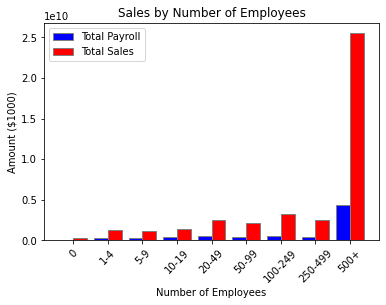

In [15]:
x = np.arange(len(label_code))
plt.bar(x-0.2, payroll_total,color='b',edgecolor ='grey',width=0.4,label='Total Payroll')
plt.bar(x+0.2, sales_total,color='r',edgecolor ='grey',width=0.4,label='Total Sales')
plt.xlabel("Number of Employees")
plt.ylabel("Amount ($1000)")
plt.title(f"Sales by Number of Employees")
plt.xticks(x, ('0', '1-4', '5-9', '10-19', '20-49', '50-99', '100-249', '250-499', '500+'),rotation=45)
plt.legend()
plt.show()

###### Bar chart for male sales and male payroll using Plotly

In [11]:
plot = px.Figure(data=[px.Bar(
    name = 'Male Sales',
    x = label_code,
    y = sales_male
   ),
                       px.Bar(
    name = 'Male Payroll',
    x = label_code,
    y = payroll_male
   ),
])
plot.update_layout(title = "Sales and Payrolls by Number of Male Employees", title_x=0.5)
plot.update_layout(xaxis_title="Number of Employees", yaxis_title="Amount ($1000)")
plot.show()

###### Bar chart for female sales and male payroll using Plotly

In [12]:
plot = px.Figure(data=[px.Bar(
    name = 'Female Sales',
    x = label_code,
    y = sales_female
   ),
                       px.Bar(
    name = 'Female Payroll',
    x = label_code,
    y = payroll_female
   )
])
plot.update_layout(title = "Sales and Payrolls by Number of Female Employees", title_x=0.5)
plot.update_layout(xaxis_title="Number of Employees", yaxis_title="Amount ($1000)")
plot.show()